In [18]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# loading the csv data to a Pandas DataFrame
liver_data = pd.read_csv('F:\liverproject\indian_liver_patient.csv')

In [20]:
# Show the first five lines of dataset
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [21]:
#summay of data
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Number of records: 583
Number of patients likely to have liver disease 416
Number of patients unlikely to have liver disease 167
Percentage of patients likely to have liver disease 71.35506003430532%


<Axes: xlabel='Dataset', ylabel='count'>

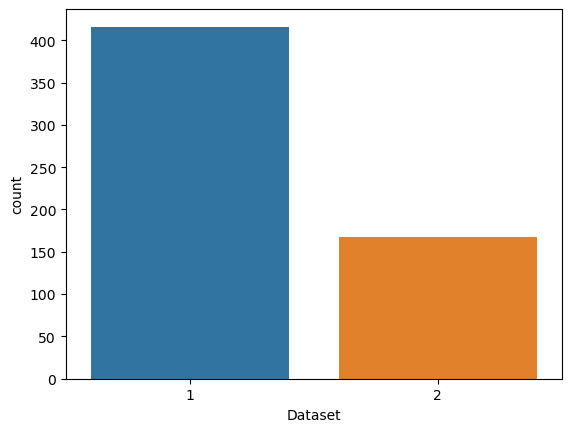

In [22]:
import seaborn as sns

n_records = len(liver_data.index)
n_records_liv_pos = len(liver_data[liver_data['Dataset'] == 1])
n_records_liv_neg = len(liver_data[liver_data['Dataset'] == 2])
percent_liver_disease_pos = (n_records_liv_pos/n_records)*100

print("Number of records: {}".format(n_records))
print("Number of patients likely to have liver disease {}".format(n_records_liv_pos))
print("Number of patients unlikely to have liver disease {}".format(n_records_liv_neg))
print("Percentage of patients likely to have liver disease {}%".format(percent_liver_disease_pos))
#count plot for visualization
sns.countplot(data=liver_data, x = 'Dataset', label='Count')

In [23]:
# Split the data into features and target label
liver_data_labels = liver_data['Dataset']
# Drop label feature
liver_data_features = liver_data.drop(['Dataset'], axis=1)
liver_data_features.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [24]:
#finding the missing values 
liver_data_features.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
dtype: int64

In [25]:
# fill missing values with median value
liver_data_features.Albumin_and_Globulin_Ratio.fillna(liver_data_features['Albumin_and_Globulin_Ratio'].median(), inplace=True)

albumin_globulin_missing_indices = [209, 241, 253, 312]
liver_data_features.loc[albumin_globulin_missing_indices].head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,0.93
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,0.93
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,0.93
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,0.93


Number of patients that are male:  441
Number of patients that are female:  142


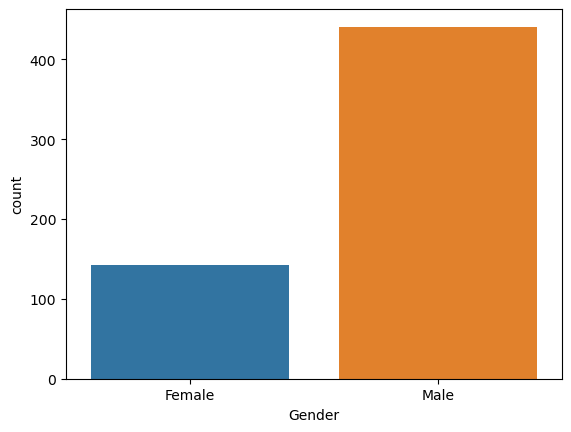

In [26]:
# data visualization 
sns.countplot(data=liver_data, x = 'Gender', label='Count')

M, F = liver_data['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

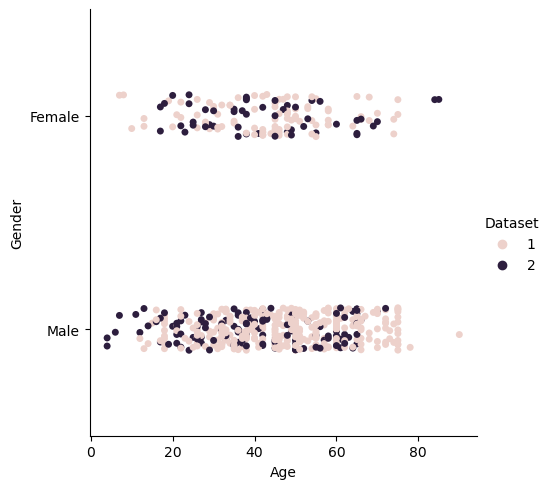

In [28]:
# Factor plot data visulization 
import seaborn as sns
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_data);
# age seems to be a factor for male and female 

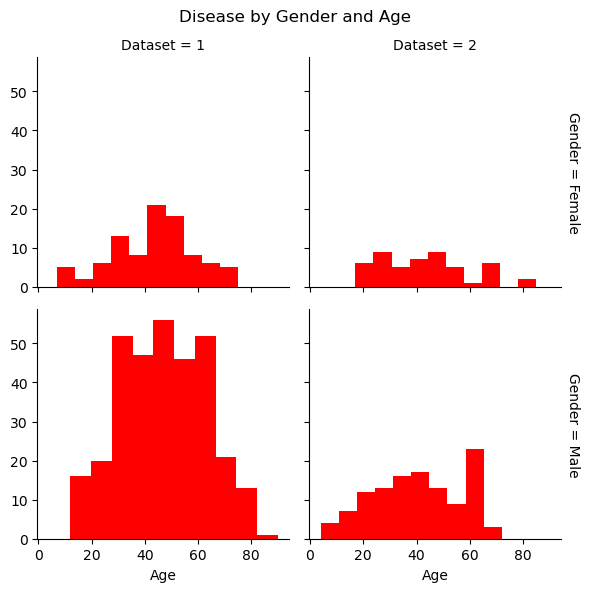

In [30]:
g = sns.FacetGrid(liver_data, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');


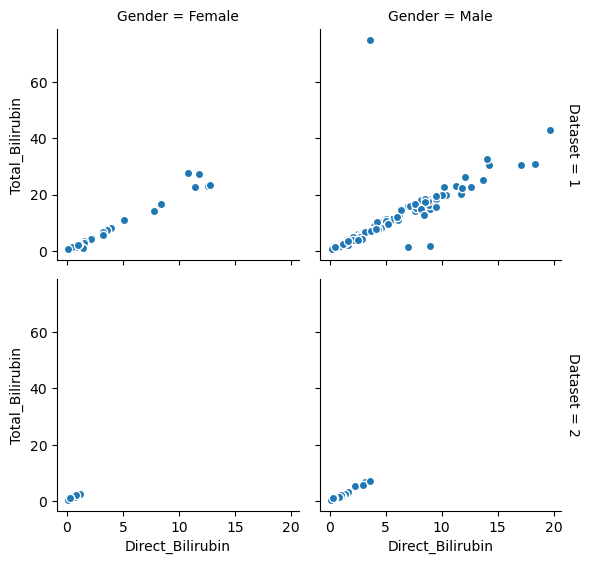

In [31]:
g = sns.FacetGrid(liver_data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

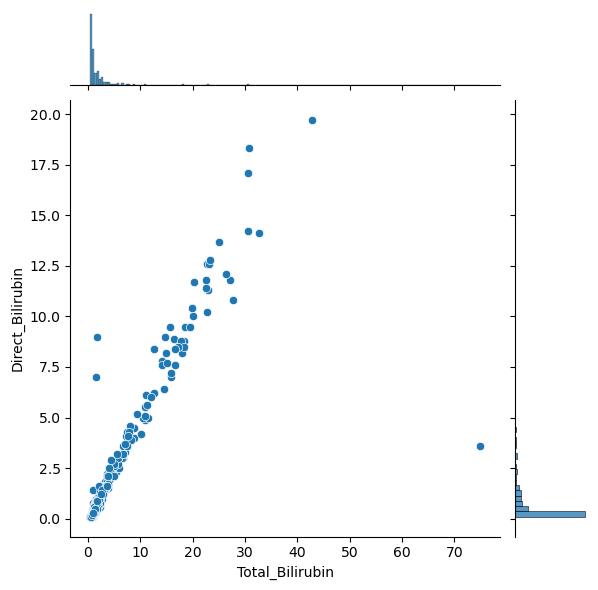

In [45]:
#linear relation between bilirbun and Total_Bilirubin
sns.jointplot(x='Total_Bilirubin', y='Direct_Bilirubin', data=liver_data_features)
plt.show()

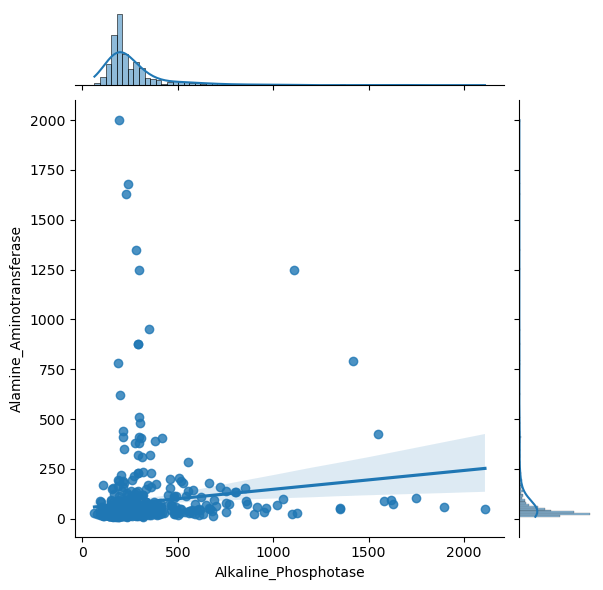

In [49]:
# show non linear relation between alkaline phosphate and alamine aminotransferase
sns.jointplot(x="Alkaline_Phosphotase", y="Alamine_Aminotransferase", data=liver_data, kind="reg")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

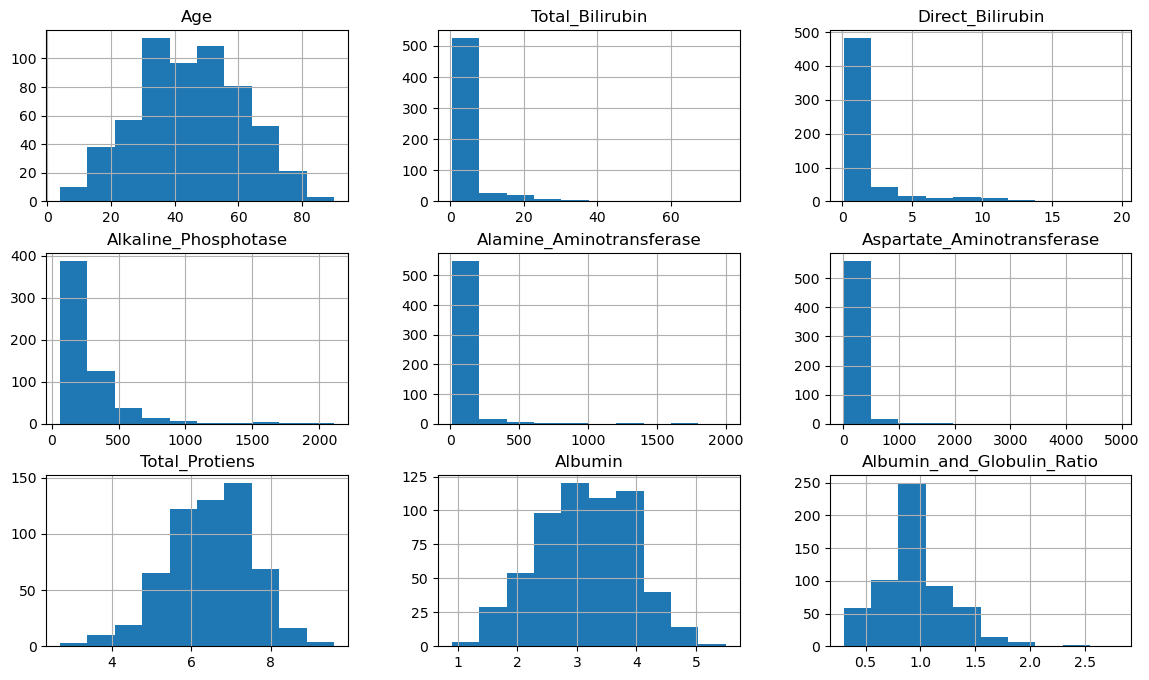

In [51]:
# plot features histogram
liver_data_features.hist(figsize=(14,8))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate_Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin_and_Globulin_Ratio'}>]],
      dtype=object)

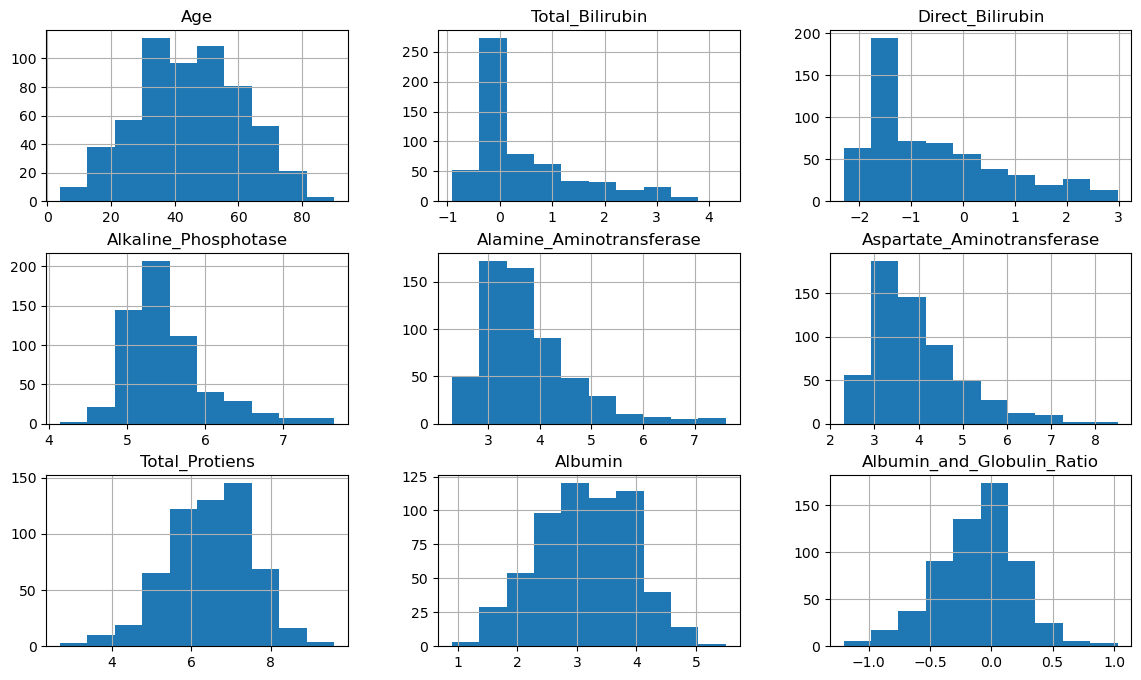

In [52]:
# Data Normalization 


skewed = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_transformed = pd.DataFrame(data = liver_data_features)
liver_data_features_log_transformed[skewed] = liver_data_features[skewed].apply(lambda x: np.log(x))

liver_data_features_log_transformed.hist(figsize=(14,8))



In [86]:
 liver_data_features_log_transformed.head()
#liver_data_features_log_transformed.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,-0.356675,-2.302585,5.231109,2.772589,2.890372,6.8,3.3,-0.105361
1,62,Male,2.388763,1.704748,6.549651,4.158883,4.605170,7.5,3.2,-0.301105
2,62,Male,1.987874,1.410987,6.194405,4.094345,4.219508,7.0,3.3,-0.116534
3,58,Male,0.000000,-0.916291,5.204007,2.639057,2.995732,6.8,3.4,0.000000
4,72,Male,1.360977,0.693147,5.273000,3.295837,4.077537,7.3,2.4,-0.916291


In [54]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
             'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']

liver_data_features_log_minmax_transform = pd.DataFrame(data = liver_data_features_log_transformed)
liver_data_features_log_minmax_transform[numerical] = scaler.fit_transform(liver_data_features_log_transformed[numerical])

display(liver_data_features_log_minmax_transform.head(n = 5))

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.709302,Female,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859
1,0.674419,Male,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222
2,0.674419,Male,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857
3,0.627907,Male,0.175072,0.262397,0.302130,0.063505,0.111792,0.594203,0.543478,0.539030
4,0.790698,Male,0.435110,0.567029,0.321779,0.187466,0.286268,0.666667,0.326087,0.128798


In [55]:
# one hot encoding used to convert catagorical features to numerical 

liver_data_features_final = pd.get_dummies(liver_data_features_log_minmax_transform, columns=['Gender'])
liver_data_features_final.head(n=3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,0.709302,0.106924,0.000000,0.309849,0.088708,0.094800,0.594203,0.521739,0.491859,True,False
1,0.674419,0.631485,0.758504,0.685362,0.350356,0.371366,0.695652,0.500000,0.404222,False,True
2,0.674419,0.554889,0.702902,0.584190,0.338175,0.309166,0.623188,0.521739,0.486857,False,True


In [56]:
#Assume naive predictor which always predicts liver disease
true_pos = n_records_liv_pos
false_pos = liver_data_labels.count() - true_pos
true_neg = 0
false_neg = 0
print('true positives: {} | true negatives: {}'.format(true_pos,false_pos))

# TODO: Calculate accuracy, precision and recall
accuracy = true_pos/liver_data_labels.count()
recall = true_pos/(true_pos + false_neg)
precision = true_pos/(true_pos + false_pos)
print('accuracy: {} | precision: {} | recall: {}'.format(accuracy, precision, recall))

# TODO: Calculate F-score using the formula above
beta = 2
fscore = (1 + beta * beta) * (precision * recall) / (beta * beta * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

true positives: 416 | true negatives: 167
accuracy: 0.7135506003430532 | precision: 0.7135506003430532 | recall: 1.0
Naive Predictor: [Accuracy score: 0.7136, F-score: 0.9257]


In [57]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'disease prediction' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(liver_data_features_final, 
                                                    liver_data_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 24,
                                                    shuffle = True)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 466 samples.
Testing set has 117 samples.


In [67]:
from sklearn.metrics import fbeta_score,accuracy_score
from time import time
from datetime import datetime
from IPython.display import display
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 150 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:150])
    end = time() # Get end time
    
    #  : Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  : Compute accuracy on the first 150 training samples which is y_train[:150]
    results['acc_train'] = accuracy_score(y_train[:150], predictions_train)
        
    #  : Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #  : Compute F-score on the the first 150 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:150], predictions_train, beta=2)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print(results)
        
    # Return the results
    return results


In [68]:
from sklearn.linear_model import LogisticRegression

clf_bench = LogisticRegression(random_state=24)
sample_size = X_train.shape[0]
results_bench = {}

results_bench = train_predict(clf_bench, sample_size, X_train, y_train, X_test, y_test)

# print('Performance metrics for Logistic regression (additional benchmark)')
print('Accuracy score on training set: {} | Accuracy score on testing set: {} | F-score on training set: {} | F-score on test set: {}'.format(results_bench['acc_train'], results_bench['acc_test'], results_bench['f_train'], results_bench['f_test']))


LogisticRegression trained on 466 samples.
{'train_time': 0.0259854793548584, 'pred_time': 0.0049953460693359375, 'acc_train': 0.7066666666666667, 'acc_test': 0.6837606837606838, 'f_train': 0.9001782531194296, 'f_test': 0.8720930232558138}
Accuracy score on training set: 0.7066666666666667 | Accuracy score on testing set: 0.6837606837606838 | F-score on training set: 0.9001782531194296 | F-score on test set: 0.8720930232558138


In [72]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

clf_A = SVC(random_state=24)
clf_B = KNeighborsClassifier()
clf_C = RandomForestClassifier(random_state=24)

#clf_all = [clf_A, clf_B, clf_C,clf_D,clf_E]
clf_all = [clf_A, clf_B, clf_C,]

# # Calculate the number of samples for 20%, 50%, and 100% of the training data
samples_100 = len(y_train)
samples_50 = int(samples_100 * .5)
samples_20 = int(samples_100 * .2)

# # Collect results on the learners
results = {}
for clf in clf_all:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

SVC trained on 93 samples.
{'train_time': 0.007010221481323242, 'pred_time': 0.005995512008666992, 'acc_train': 0.72, 'acc_test': 0.6837606837606838, 'f_train': 0.9147424511545293, 'f_test': 0.8944954128440367}
SVC trained on 233 samples.
{'train_time': 0.0059816837310791016, 'pred_time': 0.009009599685668945, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
SVC trained on 466 samples.
{'train_time': 0.0, 'pred_time': 0.024058818817138672, 'acc_train': 0.7, 'acc_test': 0.6923076923076923, 'f_train': 0.9210526315789475, 'f_test': 0.9183673469387755}
KNeighborsClassifier trained on 93 samples.
{'train_time': 0.011937141418457031, 'pred_time': 0.015233993530273438, 'acc_train': 0.7666666666666667, 'acc_test': 0.6666666666666666, 'f_train': 0.8796296296296297, 'f_test': 0.8214285714285714}
KNeighborsClassifier trained on 233 samples.
{'train_time': 0.002997875213623047, 'pred_time': 0.009039640426635742, 'acc_train': 0.753333333

In [73]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

clf_D = LinearSVC(random_state=24)
clf_E = DecisionTreeClassifier(random_state=24)
clf_F = AdaBoostClassifier(random_state=24)
clf_G = GaussianNB()
clf_H = SGDClassifier(random_state=24)
clf_k = CatBoostClassifier(random_state=24)


clf_more = [clf_D, clf_E, clf_F,clf_G,clf_H,clf_k]

more_results = {}
for clf in clf_more:
    clf_name = clf.__class__.__name__
    more_results[clf_name] = {}
    for i, samples in enumerate([samples_20, samples_50, samples_100]):
        more_results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        


LinearSVC trained on 93 samples.
{'train_time': 0.015640735626220703, 'pred_time': 0.0, 'acc_train': 0.74, 'acc_test': 0.6752136752136753, 'f_train': 0.9025270758122744, 'f_test': 0.8153477218225419}
LinearSVC trained on 233 samples.
{'train_time': 0.0, 'pred_time': 0.015624523162841797, 'acc_train': 0.7266666666666667, 'acc_test': 0.7008547008547008, 'f_train': 0.9163701067615658, 'f_test': 0.9059633027522935}
LinearSVC trained on 466 samples.
{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.7266666666666667, 'acc_test': 0.6752136752136753, 'f_train': 0.9107142857142857, 'f_test': 0.8548009367681499}
DecisionTreeClassifier trained on 93 samples.
{'train_time': 0.0, 'pred_time': 0.0, 'acc_train': 0.8333333333333334, 'acc_test': 0.5897435897435898, 'f_train': 0.9022556390977444, 'f_test': 0.7299270072992701}
DecisionTreeClassifier trained on 233 samples.
{'train_time': 0.0, 'pred_time': 0.015627622604370117, 'acc_train': 1.0, 'acc_test': 0.5811965811965812, 'f_train': 1.0, 'f_test':

120:	learn: 0.5126871	total: 399ms	remaining: 2.9s
121:	learn: 0.5113555	total: 401ms	remaining: 2.88s
122:	learn: 0.5102384	total: 402ms	remaining: 2.87s
123:	learn: 0.5091165	total: 404ms	remaining: 2.85s
124:	learn: 0.5078874	total: 406ms	remaining: 2.84s
125:	learn: 0.5073527	total: 407ms	remaining: 2.82s
126:	learn: 0.5059952	total: 409ms	remaining: 2.81s
127:	learn: 0.5050989	total: 411ms	remaining: 2.8s
128:	learn: 0.5044396	total: 413ms	remaining: 2.79s
129:	learn: 0.5028829	total: 415ms	remaining: 2.78s
130:	learn: 0.5019589	total: 417ms	remaining: 2.77s
131:	learn: 0.5009640	total: 419ms	remaining: 2.75s
132:	learn: 0.4996768	total: 420ms	remaining: 2.74s
133:	learn: 0.4980586	total: 422ms	remaining: 2.73s
134:	learn: 0.4966149	total: 424ms	remaining: 2.72s
135:	learn: 0.4953177	total: 426ms	remaining: 2.71s
136:	learn: 0.4945113	total: 428ms	remaining: 2.7s
137:	learn: 0.4934268	total: 430ms	remaining: 2.69s
138:	learn: 0.4923152	total: 433ms	remaining: 2.68s
139:	learn: 0.4

339:	learn: 0.3412193	total: 775ms	remaining: 1.5s
340:	learn: 0.3406853	total: 778ms	remaining: 1.5s
341:	learn: 0.3405082	total: 780ms	remaining: 1.5s
342:	learn: 0.3398641	total: 782ms	remaining: 1.5s
343:	learn: 0.3392287	total: 784ms	remaining: 1.49s
344:	learn: 0.3385378	total: 786ms	remaining: 1.49s
345:	learn: 0.3379615	total: 787ms	remaining: 1.49s
346:	learn: 0.3373736	total: 789ms	remaining: 1.49s
347:	learn: 0.3369676	total: 791ms	remaining: 1.48s
348:	learn: 0.3363339	total: 793ms	remaining: 1.48s
349:	learn: 0.3359563	total: 795ms	remaining: 1.48s
350:	learn: 0.3355917	total: 797ms	remaining: 1.47s
351:	learn: 0.3350964	total: 799ms	remaining: 1.47s
352:	learn: 0.3343652	total: 800ms	remaining: 1.47s
353:	learn: 0.3337960	total: 802ms	remaining: 1.46s
354:	learn: 0.3330997	total: 804ms	remaining: 1.46s
355:	learn: 0.3329385	total: 806ms	remaining: 1.46s
356:	learn: 0.3326069	total: 808ms	remaining: 1.46s
357:	learn: 0.3320556	total: 810ms	remaining: 1.45s
358:	learn: 0.33

559:	learn: 0.2510292	total: 1.16s	remaining: 915ms
560:	learn: 0.2505511	total: 1.17s	remaining: 913ms
561:	learn: 0.2503002	total: 1.17s	remaining: 911ms
562:	learn: 0.2499650	total: 1.17s	remaining: 908ms
563:	learn: 0.2496906	total: 1.17s	remaining: 906ms
564:	learn: 0.2493196	total: 1.17s	remaining: 904ms
565:	learn: 0.2490105	total: 1.18s	remaining: 901ms
566:	learn: 0.2485794	total: 1.18s	remaining: 899ms
567:	learn: 0.2482907	total: 1.18s	remaining: 896ms
568:	learn: 0.2480180	total: 1.18s	remaining: 894ms
569:	learn: 0.2475867	total: 1.18s	remaining: 892ms
570:	learn: 0.2470758	total: 1.18s	remaining: 889ms
571:	learn: 0.2469625	total: 1.19s	remaining: 887ms
572:	learn: 0.2466102	total: 1.19s	remaining: 884ms
573:	learn: 0.2462333	total: 1.19s	remaining: 882ms
574:	learn: 0.2460083	total: 1.19s	remaining: 880ms
575:	learn: 0.2457136	total: 1.19s	remaining: 877ms
576:	learn: 0.2455311	total: 1.19s	remaining: 875ms
577:	learn: 0.2453941	total: 1.2s	remaining: 873ms
578:	learn: 0

774:	learn: 0.1938253	total: 1.55s	remaining: 450ms
775:	learn: 0.1936696	total: 1.55s	remaining: 448ms
776:	learn: 0.1934332	total: 1.55s	remaining: 446ms
777:	learn: 0.1932819	total: 1.55s	remaining: 444ms
778:	learn: 0.1930781	total: 1.56s	remaining: 442ms
779:	learn: 0.1929740	total: 1.56s	remaining: 440ms
780:	learn: 0.1926316	total: 1.56s	remaining: 438ms
781:	learn: 0.1923980	total: 1.56s	remaining: 435ms
782:	learn: 0.1921919	total: 1.56s	remaining: 433ms
783:	learn: 0.1919934	total: 1.56s	remaining: 431ms
784:	learn: 0.1916364	total: 1.57s	remaining: 429ms
785:	learn: 0.1913739	total: 1.57s	remaining: 427ms
786:	learn: 0.1910497	total: 1.57s	remaining: 425ms
787:	learn: 0.1909116	total: 1.57s	remaining: 423ms
788:	learn: 0.1907014	total: 1.57s	remaining: 421ms
789:	learn: 0.1905760	total: 1.58s	remaining: 419ms
790:	learn: 0.1904205	total: 1.58s	remaining: 417ms
791:	learn: 0.1901209	total: 1.58s	remaining: 415ms
792:	learn: 0.1899297	total: 1.58s	remaining: 413ms
793:	learn: 

988:	learn: 0.1519728	total: 1.94s	remaining: 21.6ms
989:	learn: 0.1516897	total: 1.94s	remaining: 19.6ms
990:	learn: 0.1516435	total: 1.95s	remaining: 17.7ms
991:	learn: 0.1514528	total: 1.95s	remaining: 15.7ms
992:	learn: 0.1513012	total: 1.95s	remaining: 13.7ms
993:	learn: 0.1511179	total: 1.95s	remaining: 11.8ms
994:	learn: 0.1510204	total: 1.95s	remaining: 9.81ms
995:	learn: 0.1507671	total: 1.95s	remaining: 7.85ms
996:	learn: 0.1507179	total: 1.96s	remaining: 5.88ms
997:	learn: 0.1505894	total: 1.96s	remaining: 3.92ms
998:	learn: 0.1503598	total: 1.96s	remaining: 1.96ms
999:	learn: 0.1501864	total: 1.96s	remaining: 0us
CatBoostClassifier trained on 93 samples.
{'train_time': 2.1929931640625, 'pred_time': 0.004580020904541016, 'acc_train': 0.8666666666666667, 'acc_test': 0.6752136752136753, 'f_train': 0.928705440900563, 'f_test': 0.8233890214797135}
Learning rate set to 0.005531
0:	learn: 0.6903916	total: 2.87ms	remaining: 2.86s
1:	learn: 0.6881030	total: 5.01ms	remaining: 2.5s
2:

151:	learn: 0.4732925	total: 317ms	remaining: 1.77s
152:	learn: 0.4725329	total: 320ms	remaining: 1.77s
153:	learn: 0.4719700	total: 322ms	remaining: 1.77s
154:	learn: 0.4710703	total: 325ms	remaining: 1.77s
155:	learn: 0.4700862	total: 327ms	remaining: 1.77s
156:	learn: 0.4689663	total: 329ms	remaining: 1.77s
157:	learn: 0.4683665	total: 332ms	remaining: 1.77s
158:	learn: 0.4678071	total: 334ms	remaining: 1.77s
159:	learn: 0.4670843	total: 336ms	remaining: 1.76s
160:	learn: 0.4664339	total: 338ms	remaining: 1.76s
161:	learn: 0.4656114	total: 340ms	remaining: 1.76s
162:	learn: 0.4649356	total: 343ms	remaining: 1.76s
163:	learn: 0.4643612	total: 345ms	remaining: 1.76s
164:	learn: 0.4638242	total: 347ms	remaining: 1.75s
165:	learn: 0.4632792	total: 349ms	remaining: 1.75s
166:	learn: 0.4629152	total: 351ms	remaining: 1.75s
167:	learn: 0.4624274	total: 353ms	remaining: 1.75s
168:	learn: 0.4615736	total: 355ms	remaining: 1.75s
169:	learn: 0.4608662	total: 358ms	remaining: 1.75s
170:	learn: 

339:	learn: 0.3786561	total: 706ms	remaining: 1.37s
340:	learn: 0.3784398	total: 709ms	remaining: 1.37s
341:	learn: 0.3781116	total: 711ms	remaining: 1.37s
342:	learn: 0.3776422	total: 713ms	remaining: 1.37s
343:	learn: 0.3774391	total: 715ms	remaining: 1.36s
344:	learn: 0.3770029	total: 718ms	remaining: 1.36s
345:	learn: 0.3765320	total: 720ms	remaining: 1.36s
346:	learn: 0.3762526	total: 722ms	remaining: 1.36s
347:	learn: 0.3756177	total: 724ms	remaining: 1.36s
348:	learn: 0.3751581	total: 726ms	remaining: 1.35s
349:	learn: 0.3747845	total: 729ms	remaining: 1.35s
350:	learn: 0.3744046	total: 731ms	remaining: 1.35s
351:	learn: 0.3740065	total: 733ms	remaining: 1.35s
352:	learn: 0.3736762	total: 735ms	remaining: 1.35s
353:	learn: 0.3734350	total: 737ms	remaining: 1.34s
354:	learn: 0.3725408	total: 740ms	remaining: 1.34s
355:	learn: 0.3722518	total: 742ms	remaining: 1.34s
356:	learn: 0.3720384	total: 745ms	remaining: 1.34s
357:	learn: 0.3719281	total: 747ms	remaining: 1.34s
358:	learn: 

525:	learn: 0.3166106	total: 1.1s	remaining: 992ms
526:	learn: 0.3163239	total: 1.1s	remaining: 990ms
527:	learn: 0.3159474	total: 1.1s	remaining: 988ms
528:	learn: 0.3155861	total: 1.11s	remaining: 986ms
529:	learn: 0.3152164	total: 1.11s	remaining: 984ms
530:	learn: 0.3148869	total: 1.11s	remaining: 982ms
531:	learn: 0.3145291	total: 1.11s	remaining: 980ms
532:	learn: 0.3142288	total: 1.11s	remaining: 978ms
533:	learn: 0.3138930	total: 1.12s	remaining: 975ms
534:	learn: 0.3135945	total: 1.12s	remaining: 973ms
535:	learn: 0.3134041	total: 1.12s	remaining: 971ms
536:	learn: 0.3131816	total: 1.12s	remaining: 969ms
537:	learn: 0.3128255	total: 1.13s	remaining: 967ms
538:	learn: 0.3125734	total: 1.13s	remaining: 967ms
539:	learn: 0.3123208	total: 1.13s	remaining: 966ms
540:	learn: 0.3120471	total: 1.14s	remaining: 966ms
541:	learn: 0.3117832	total: 1.14s	remaining: 965ms
542:	learn: 0.3116578	total: 1.15s	remaining: 966ms
543:	learn: 0.3113750	total: 1.15s	remaining: 965ms
544:	learn: 0.3

697:	learn: 0.2692623	total: 1.49s	remaining: 643ms
698:	learn: 0.2691794	total: 1.49s	remaining: 641ms
699:	learn: 0.2690223	total: 1.49s	remaining: 639ms
700:	learn: 0.2687413	total: 1.49s	remaining: 637ms
701:	learn: 0.2684590	total: 1.49s	remaining: 634ms
702:	learn: 0.2682207	total: 1.5s	remaining: 632ms
703:	learn: 0.2680407	total: 1.5s	remaining: 630ms
704:	learn: 0.2677325	total: 1.5s	remaining: 628ms
705:	learn: 0.2675979	total: 1.5s	remaining: 626ms
706:	learn: 0.2672081	total: 1.5s	remaining: 624ms
707:	learn: 0.2668132	total: 1.51s	remaining: 622ms
708:	learn: 0.2666373	total: 1.51s	remaining: 619ms
709:	learn: 0.2665039	total: 1.51s	remaining: 617ms
710:	learn: 0.2662935	total: 1.51s	remaining: 615ms
711:	learn: 0.2660282	total: 1.52s	remaining: 613ms
712:	learn: 0.2658794	total: 1.52s	remaining: 611ms
713:	learn: 0.2656644	total: 1.52s	remaining: 609ms
714:	learn: 0.2653414	total: 1.52s	remaining: 607ms
715:	learn: 0.2651324	total: 1.52s	remaining: 605ms
716:	learn: 0.265

868:	learn: 0.2315702	total: 1.88s	remaining: 283ms
869:	learn: 0.2311274	total: 1.88s	remaining: 281ms
870:	learn: 0.2308847	total: 1.88s	remaining: 279ms
871:	learn: 0.2306098	total: 1.88s	remaining: 276ms
872:	learn: 0.2304814	total: 1.88s	remaining: 274ms
873:	learn: 0.2303420	total: 1.89s	remaining: 272ms
874:	learn: 0.2302359	total: 1.89s	remaining: 270ms
875:	learn: 0.2301690	total: 1.89s	remaining: 268ms
876:	learn: 0.2300951	total: 1.89s	remaining: 266ms
877:	learn: 0.2300076	total: 1.9s	remaining: 263ms
878:	learn: 0.2297014	total: 1.9s	remaining: 261ms
879:	learn: 0.2295644	total: 1.9s	remaining: 259ms
880:	learn: 0.2292744	total: 1.9s	remaining: 257ms
881:	learn: 0.2291587	total: 1.9s	remaining: 255ms
882:	learn: 0.2291035	total: 1.91s	remaining: 252ms
883:	learn: 0.2289832	total: 1.91s	remaining: 250ms
884:	learn: 0.2288279	total: 1.91s	remaining: 248ms
885:	learn: 0.2284447	total: 1.91s	remaining: 246ms
886:	learn: 0.2282312	total: 1.91s	remaining: 244ms
887:	learn: 0.228

34:	learn: 0.5912558	total: 83.3ms	remaining: 2.3s
35:	learn: 0.5887808	total: 86ms	remaining: 2.3s
36:	learn: 0.5876371	total: 87.8ms	remaining: 2.28s
37:	learn: 0.5852901	total: 90.2ms	remaining: 2.28s
38:	learn: 0.5834797	total: 92.4ms	remaining: 2.28s
39:	learn: 0.5809785	total: 94.6ms	remaining: 2.27s
40:	learn: 0.5791912	total: 96.8ms	remaining: 2.26s
41:	learn: 0.5764087	total: 99ms	remaining: 2.26s
42:	learn: 0.5738839	total: 101ms	remaining: 2.25s
43:	learn: 0.5713438	total: 104ms	remaining: 2.26s
44:	learn: 0.5690254	total: 106ms	remaining: 2.26s
45:	learn: 0.5664630	total: 109ms	remaining: 2.25s
46:	learn: 0.5648304	total: 111ms	remaining: 2.25s
47:	learn: 0.5624258	total: 113ms	remaining: 2.24s
48:	learn: 0.5604374	total: 115ms	remaining: 2.24s
49:	learn: 0.5586326	total: 118ms	remaining: 2.23s
50:	learn: 0.5567350	total: 120ms	remaining: 2.23s
51:	learn: 0.5550467	total: 122ms	remaining: 2.23s
52:	learn: 0.5533855	total: 124ms	remaining: 2.22s
53:	learn: 0.5517355	total: 1

211:	learn: 0.4171454	total: 483ms	remaining: 1.79s
212:	learn: 0.4168954	total: 485ms	remaining: 1.79s
213:	learn: 0.4165576	total: 487ms	remaining: 1.79s
214:	learn: 0.4160415	total: 489ms	remaining: 1.79s
215:	learn: 0.4157511	total: 492ms	remaining: 1.78s
216:	learn: 0.4153636	total: 494ms	remaining: 1.78s
217:	learn: 0.4147837	total: 496ms	remaining: 1.78s
218:	learn: 0.4143354	total: 498ms	remaining: 1.78s
219:	learn: 0.4136931	total: 501ms	remaining: 1.77s
220:	learn: 0.4132670	total: 503ms	remaining: 1.77s
221:	learn: 0.4129692	total: 505ms	remaining: 1.77s
222:	learn: 0.4125817	total: 507ms	remaining: 1.77s
223:	learn: 0.4121311	total: 509ms	remaining: 1.76s
224:	learn: 0.4120139	total: 512ms	remaining: 1.76s
225:	learn: 0.4113733	total: 514ms	remaining: 1.76s
226:	learn: 0.4111936	total: 516ms	remaining: 1.76s
227:	learn: 0.4107406	total: 518ms	remaining: 1.75s
228:	learn: 0.4100532	total: 521ms	remaining: 1.75s
229:	learn: 0.4095528	total: 523ms	remaining: 1.75s
230:	learn: 

389:	learn: 0.3541334	total: 879ms	remaining: 1.38s
390:	learn: 0.3539601	total: 882ms	remaining: 1.37s
391:	learn: 0.3538614	total: 884ms	remaining: 1.37s
392:	learn: 0.3535567	total: 886ms	remaining: 1.37s
393:	learn: 0.3533275	total: 888ms	remaining: 1.37s
394:	learn: 0.3532009	total: 891ms	remaining: 1.36s
395:	learn: 0.3529911	total: 893ms	remaining: 1.36s
396:	learn: 0.3526908	total: 896ms	remaining: 1.36s
397:	learn: 0.3524908	total: 898ms	remaining: 1.36s
398:	learn: 0.3519939	total: 900ms	remaining: 1.36s
399:	learn: 0.3518262	total: 903ms	remaining: 1.35s
400:	learn: 0.3514134	total: 906ms	remaining: 1.35s
401:	learn: 0.3511575	total: 908ms	remaining: 1.35s
402:	learn: 0.3508998	total: 910ms	remaining: 1.35s
403:	learn: 0.3505680	total: 913ms	remaining: 1.35s
404:	learn: 0.3502857	total: 915ms	remaining: 1.34s
405:	learn: 0.3498565	total: 917ms	remaining: 1.34s
406:	learn: 0.3495533	total: 919ms	remaining: 1.34s
407:	learn: 0.3493015	total: 922ms	remaining: 1.34s
408:	learn: 

561:	learn: 0.3125788	total: 1.27s	remaining: 990ms
562:	learn: 0.3123492	total: 1.27s	remaining: 987ms
563:	learn: 0.3121836	total: 1.27s	remaining: 985ms
564:	learn: 0.3120688	total: 1.28s	remaining: 983ms
565:	learn: 0.3118094	total: 1.28s	remaining: 981ms
566:	learn: 0.3114918	total: 1.28s	remaining: 978ms
567:	learn: 0.3112484	total: 1.28s	remaining: 976ms
568:	learn: 0.3107502	total: 1.28s	remaining: 974ms
569:	learn: 0.3105881	total: 1.29s	remaining: 971ms
570:	learn: 0.3104130	total: 1.29s	remaining: 969ms
571:	learn: 0.3102326	total: 1.29s	remaining: 967ms
572:	learn: 0.3098907	total: 1.29s	remaining: 964ms
573:	learn: 0.3096812	total: 1.3s	remaining: 962ms
574:	learn: 0.3094832	total: 1.3s	remaining: 960ms
575:	learn: 0.3093311	total: 1.3s	remaining: 957ms
576:	learn: 0.3091291	total: 1.3s	remaining: 955ms
577:	learn: 0.3087848	total: 1.3s	remaining: 953ms
578:	learn: 0.3086530	total: 1.31s	remaining: 951ms
579:	learn: 0.3085239	total: 1.31s	remaining: 948ms
580:	learn: 0.308

739:	learn: 0.2751562	total: 1.67s	remaining: 586ms
740:	learn: 0.2749541	total: 1.67s	remaining: 583ms
741:	learn: 0.2747488	total: 1.67s	remaining: 581ms
742:	learn: 0.2745555	total: 1.67s	remaining: 579ms
743:	learn: 0.2743262	total: 1.68s	remaining: 577ms
744:	learn: 0.2740536	total: 1.68s	remaining: 574ms
745:	learn: 0.2736882	total: 1.68s	remaining: 572ms
746:	learn: 0.2734776	total: 1.68s	remaining: 570ms
747:	learn: 0.2733443	total: 1.69s	remaining: 568ms
748:	learn: 0.2731497	total: 1.69s	remaining: 566ms
749:	learn: 0.2728501	total: 1.69s	remaining: 563ms
750:	learn: 0.2727238	total: 1.69s	remaining: 561ms
751:	learn: 0.2725885	total: 1.69s	remaining: 559ms
752:	learn: 0.2721664	total: 1.7s	remaining: 557ms
753:	learn: 0.2720939	total: 1.7s	remaining: 555ms
754:	learn: 0.2718136	total: 1.7s	remaining: 552ms
755:	learn: 0.2715714	total: 1.7s	remaining: 550ms
756:	learn: 0.2712789	total: 1.71s	remaining: 548ms
757:	learn: 0.2711539	total: 1.71s	remaining: 546ms
758:	learn: 0.27

909:	learn: 0.2423444	total: 2.08s	remaining: 205ms
910:	learn: 0.2421714	total: 2.08s	remaining: 203ms
911:	learn: 0.2419433	total: 2.08s	remaining: 201ms
912:	learn: 0.2416653	total: 2.08s	remaining: 199ms
913:	learn: 0.2414617	total: 2.08s	remaining: 196ms
914:	learn: 0.2413300	total: 2.09s	remaining: 194ms
915:	learn: 0.2411947	total: 2.09s	remaining: 192ms
916:	learn: 0.2410734	total: 2.09s	remaining: 189ms
917:	learn: 0.2410374	total: 2.1s	remaining: 187ms
918:	learn: 0.2408564	total: 2.1s	remaining: 185ms
919:	learn: 0.2407866	total: 2.1s	remaining: 183ms
920:	learn: 0.2405443	total: 2.1s	remaining: 180ms
921:	learn: 0.2403315	total: 2.1s	remaining: 178ms
922:	learn: 0.2402401	total: 2.11s	remaining: 176ms
923:	learn: 0.2400359	total: 2.11s	remaining: 174ms
924:	learn: 0.2398136	total: 2.11s	remaining: 171ms
925:	learn: 0.2394668	total: 2.11s	remaining: 169ms
926:	learn: 0.2392617	total: 2.12s	remaining: 167ms
927:	learn: 0.2392131	total: 2.12s	remaining: 164ms
928:	learn: 0.238

In [74]:
# Creating a pickle file for the classifier
import pickle
filename = 'Liver2.pkl'
pickle.dump(CatBoostClassifier, open(filename, 'wb'))

In [78]:
#hyper parameter
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,fbeta_score
from datetime import datetime

clf = SVC(random_state=24)

kernel_options = ['linear', 'poly', 'rbf']
c_param_options = [0.01, 0.1, 1, 10]
gamma_param_options = [0.001, 0.01, 0.1, 1]

parameters = {'C': c_param_options, 'kernel': kernel_options, 'gamma': gamma_param_options}
# print(parameters)

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)
# print(scorer)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer, n_jobs=-1, verbose=1, cv=5)

# Fit the grid search object to the training data and find the optimal parameters using fit()
# print(X_train.shape, y_train.shape)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_
# print(best_clf)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# # Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

best_params = grid_fit.best_params_
best_score = grid_fit.best_score_
cv_results = grid_fit.cv_results_

print("Best parameters: {}".format(best_params))
print("Best score: {}".format(best_score))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Unoptimized model
------
Accuracy score on testing data: 0.6923
F-score on testing data: 0.9184

Optimized Model
------
Final accuracy score on the testing data: 0.6923
Final F-score on the testing data: 0.9184
Best parameters: {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
Best score: 0.927465144396321


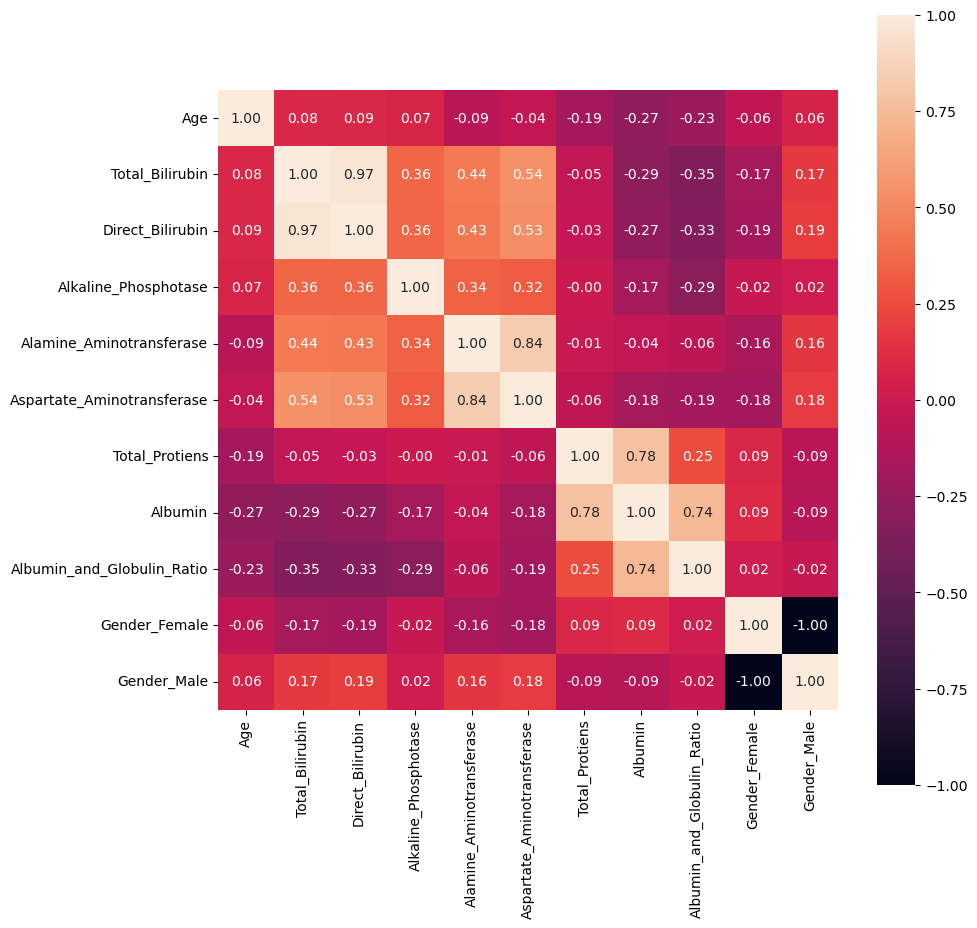

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
# calculate correlation coefficients for the dataset
correlations = liver_data_features_final.corr()
# and visualize
plt.figure(figsize=(10, 10))
g = sns.heatmap(correlations, cbar = True, square = True, annot=True, fmt= '.2f', annot_kws={'size': 10})